# <font color=green> Time Series Forecasting</font> 

## Accidents in France from 2005 to 2016 

- More details about the columns and their description can be found here.[Data Set](https://www.kaggle.com/datasets/ahmedlahlou/accidents-in-france-from-2005-to-2016)


### <font color=Blue> Data Exploration
- We'll start by loading all the provided files and exploring their structure and content.
    
### <font color=Blue> Exploratory Data Analysis (EDA)

- We'll visualize and explore the data to gain insights and identify patterns or potential anomalies.
    
### <font color=Blue> Time Series Forecasting
    
- Based on our insights from the EDA, we'll proceed to model the data using ARIMA and SARIMA.
    
    
    

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

## Step 1: Data Exploration


The datasets have been successfully loaded. Here's a brief overview of the first few rows of each:

- **Caracteristics**: Contains details about accidents, such as date, location, atmospheric conditions, and type of collision.
- **Holidays**: Lists holidays with their respective dates.
- **Places**: Describes the location and characteristics of the accident, such as the type of road, circulation, and surface condition.
- **Users**: Provides details about the individuals involved in the accidents, including age, gender, and injury severity.
- **Vehicles**: Contains information about the vehicles involved in the accidents, such as direction, type, and manner of collision.

In [194]:
import pandas as pd

try:
    caracteristics_df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1', low_memory=False)
except Exception as e:
    read_error = str(e)

# Try loading the remaining datasets
try:
    holidays_df = pd.read_csv('holidays.csv', encoding='ISO-8859-1', low_memory=False)
    places_df = pd.read_csv('places.csv', encoding='ISO-8859-1', low_memory=False)
    users_df = pd.read_csv('users.csv', encoding='ISO-8859-1',low_memory=False)
    vehicles_df = pd.read_csv('vehicles.csv', encoding='ISO-8859-1', low_memory=False)
except Exception as e:
    read_error += "\n" + str(e)

In [195]:
# caracteristics_df.to_hdf("caracteristics.hdf", key="df")
# holidays_df.to_hdf("holidays.hdf", key="df")
# places_df.to_hdf("places.hdf", key="df")
# users_df.to_hdf("users.hdf", key="df")
# vehicles_df.to_hdf("vehicles.hdf", key="df")

# vehicles_df

In [196]:

# Display the first few rows of each dataset
dfs = {
    "Caracteristics": caracteristics_df,
    "Holidays": holidays_df,
    "Places": places_df,
    "Users": users_df,
    "Vehicles": vehicles_df
}

dfs_preview = {name: df.head() for name, df in dfs.items()}
# dfs_preview
caracteristics_df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


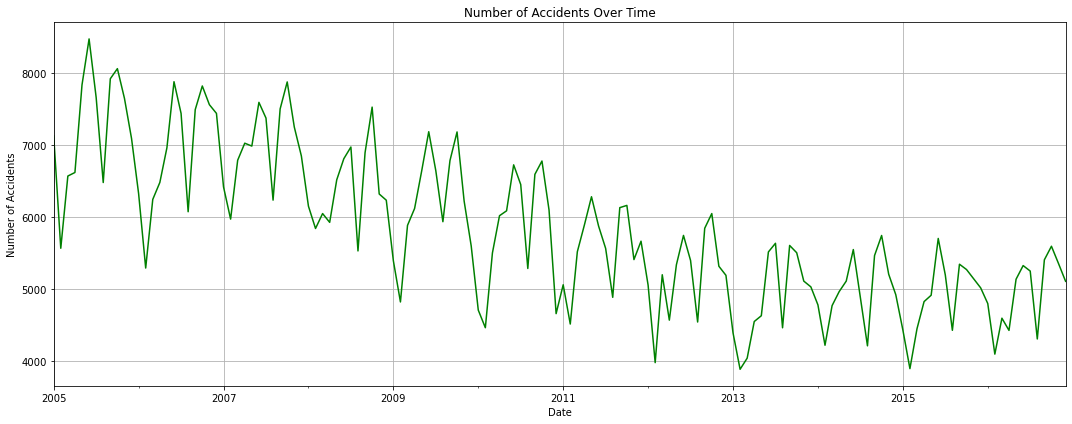

In [197]:
# Manually combine the 'year', 'mois', and 'jour' columns to create the 'date' column
# Adjust the 'an' column to get the full year and create the 'date' column
caracteristics_df1 = caracteristics_df
caracteristics_df1['year'] = 2000 + caracteristics_df1['an']
caracteristics_df1['date'] = pd.to_datetime(caracteristics_df1['year'].astype(str) + '-' + 
                                           caracteristics_df1['mois'].astype(str) + '-' + 
                                           caracteristics_df1['jour'].astype(str))

# Aggregate data to get number of accidents per month
accidents_by_month = caracteristics_df1.resample('M', on='date').size()

# Plot the number of accidents over time
plt.figure(figsize=(15, 6))
accidents_by_month.plot(color = 'Green')
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 2: Exploratory Data Analysis (EDA)


**For the EDA:**

- We'll start by checking the distribution of accidents over time.
- Explore the distribution of accidents based on some key features, such as lighting conditions, atmospheric conditions, and type of collision.
- Visualize the distribution of accidents during holidays vs. non-holidays.
- Let's start with the distribution of accidents over time.

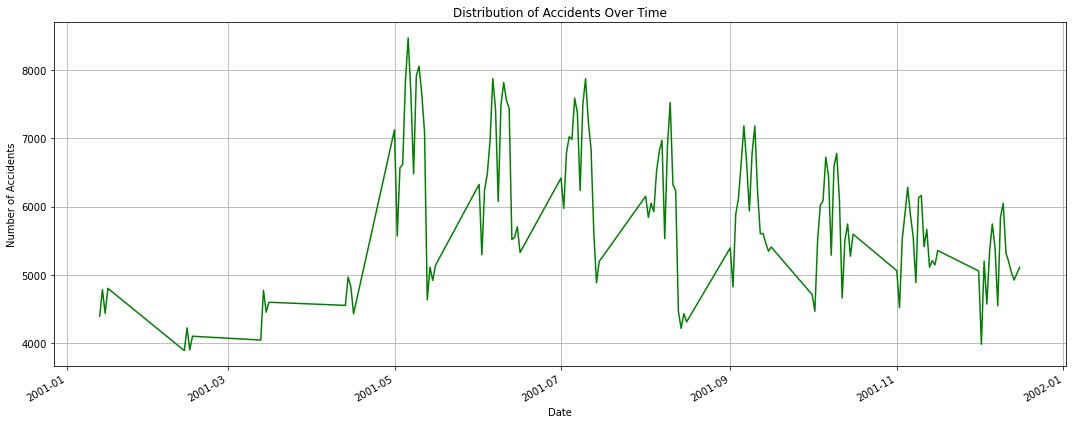

In [198]:
import matplotlib.pyplot as plt

# Convert the year and month columns to a datetime format
caracteristics_df['date'] = pd.to_datetime(caracteristics_df['an'].astype(str) + '-' + caracteristics_df['mois'].astype(str) + '-01')

# Group by month and count the number of accidents
accidents_by_month = caracteristics_df.groupby('date').size()

# Plot the distribution of accidents over time
plt.figure(figsize=(15, 6))
accidents_by_month.plot(color = 'green')
plt.title('Distribution of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot showcases the distribution of accidents over time. Some observations:

- There seems to be a decline in the number of accidents over the years, with a few noticeable spikes.
- The dataset starts from the early 2000s and goes up to around 2016.

**Next, let's explore the distribution of accidents based on some key features:**

- Lighting conditions (lum)
- Atmospheric conditions (atm)
- Type of collision (col)

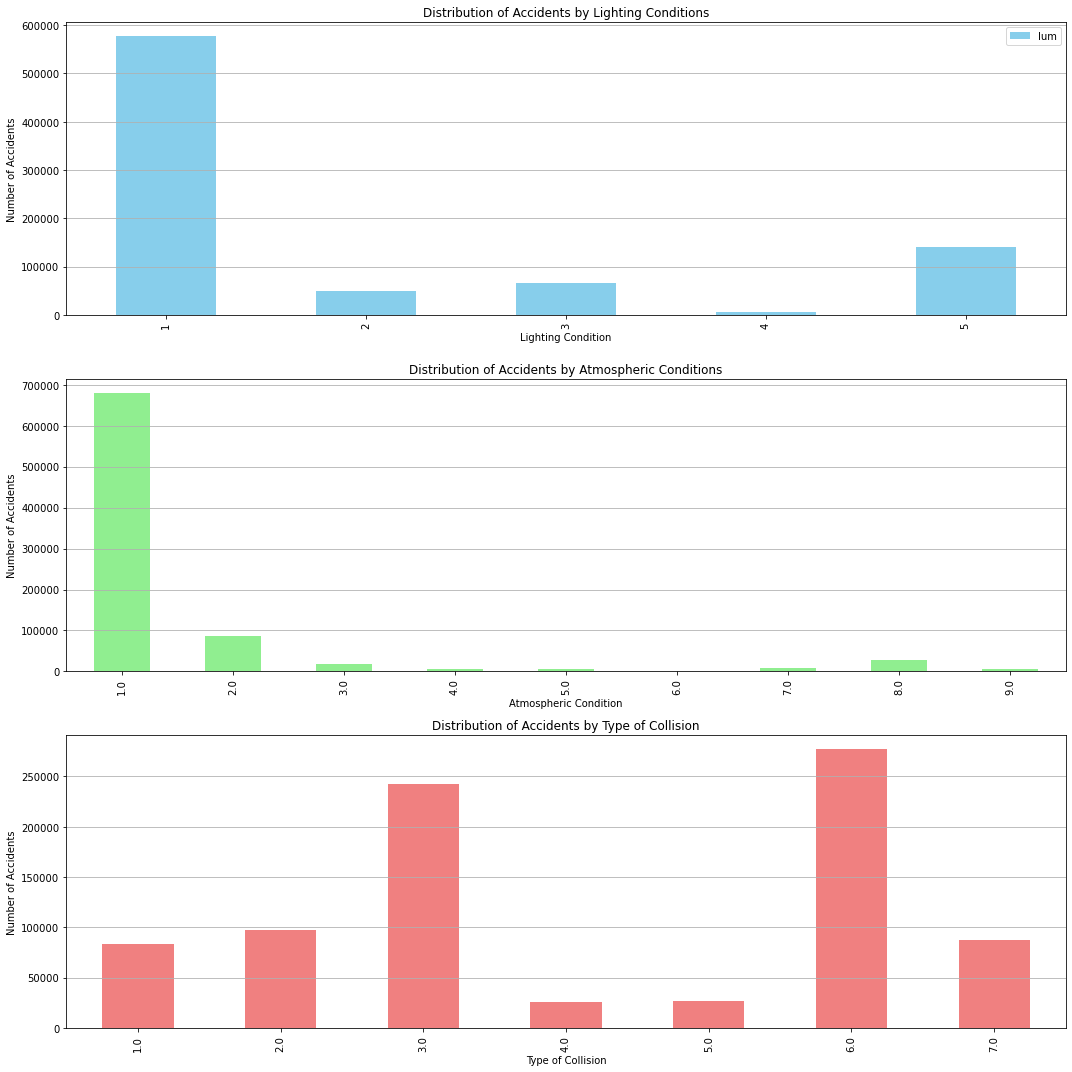

In [199]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plot distribution based on Lighting conditions
caracteristics_df['lum'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='skyblue')

ax[0].set_title('Distribution of Accidents by Lighting Conditions')
ax[0].set_xlabel('Lighting Condition')
ax[0].set_ylabel('Number of Accidents')
ax[0].legend()
ax[0].grid(axis='y')

# Plot distribution based on Atmospheric conditions
caracteristics_df['atm'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Accidents by Atmospheric Conditions')
ax[1].set_xlabel('Atmospheric Condition')
ax[1].set_ylabel('Number of Accidents')
ax[1].grid(axis='y')

# Plot distribution based on Type of collision
caracteristics_df['col'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='lightcoral')
ax[2].set_title('Distribution of Accidents by Type of Collision')
ax[2].set_xlabel('Type of Collision')
ax[2].set_ylabel('Number of Accidents')
ax[2].grid(axis='y')

# Adjust the layout
plt.tight_layout()
plt.show()


**The bar plots provide insights into the distribution of accidents based on various factors:**

- **Lighting Conditions**: Most accidents seem to occur under normal daylight(1= Full Day) conditions. However, a significant number of accidents also occur in darkness(5 = night with public lighting on).
- **Atmospheric Conditions**:(1 = Normal) atmospheric conditions account for the majority of accidents, indicating that weather might not be the primary factor in most cases. However, there are notable occurrences in conditions like (2 = light rain) and (8 = Cloudy Weather).
- **Type of Collision**: Different types of collisions are represented, with certain types being more prevalent.


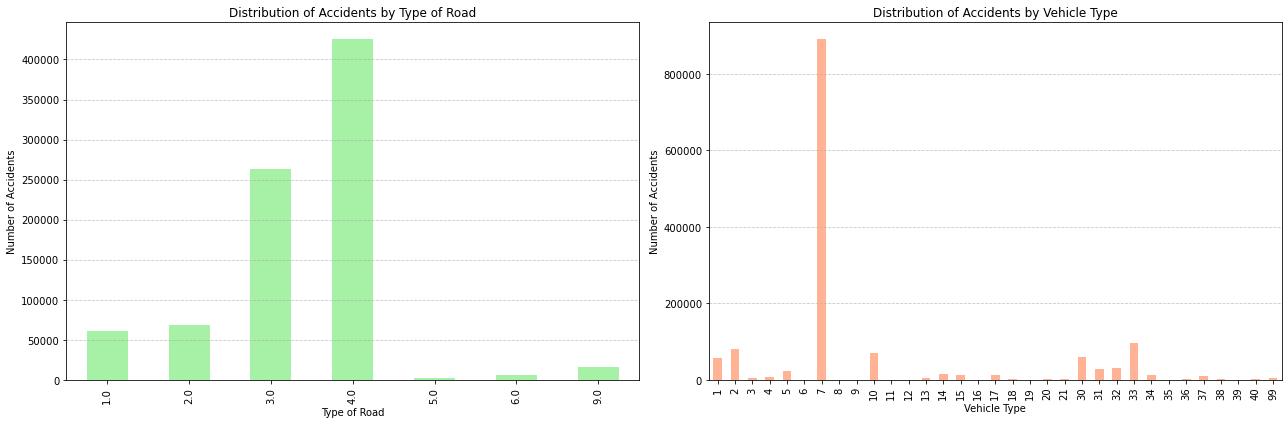

In [200]:

# Distribution of accidents based on type of road
road_type_counts = places_df['catr'].value_counts().sort_index()

# Distribution of accidents based on vehicle type
vehicle_type_counts = vehicles_df['catv'].value_counts().sort_index()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Type of road plot
road_type_counts.plot(kind='bar', ax=ax[0], color='lightgreen', alpha=0.8)
ax[0].set_title('Distribution of Accidents by Type of Road')
ax[0].set_xlabel('Type of Road')
ax[0].set_ylabel('Number of Accidents')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Vehicle type plot
vehicle_type_counts.plot(kind='bar', ax=ax[1], color='lightsalmon', alpha=0.8)
ax[1].set_title('Distribution of Accidents by Vehicle Type')
ax[1].set_xlabel('Vehicle Type')
ax[1].set_ylabel('Number of Accidents')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Here's a breakdown of the distributions:**

**Type of Road:**

- Departmental Roads have the highest number of accidents, followed by Communal Ways and National Roads.
- Highways, despite the high speeds, have fewer accidents relative to other road types. This might be due to better infrastructure and controlled environments.

**Vehicle Type:**

- Standard vehicles (likely passenger cars, Category 7) are predominantly involved in accidents.
- Bicycles (Category 1) and mopeds (Category 2) also have significant counts, underlining their involvement in road accidents.

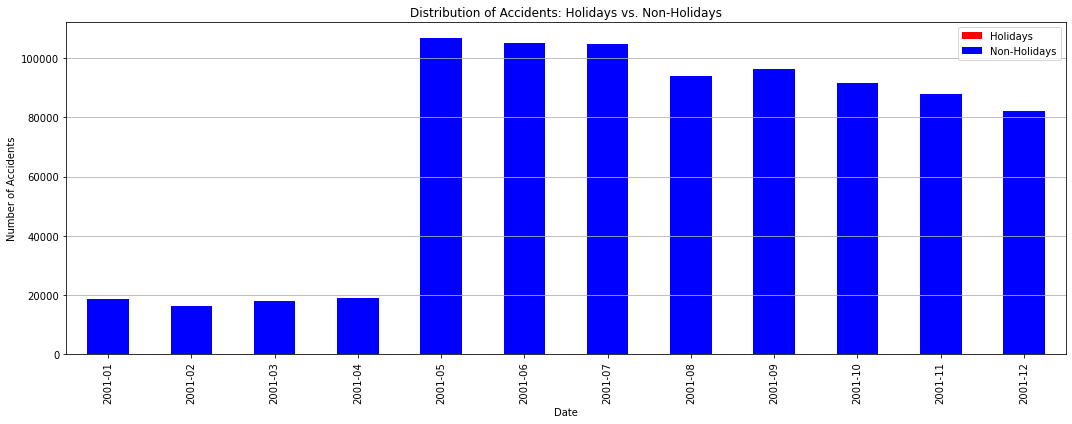

In [201]:
# Convert the holiday dates to datetime format
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])

# Extract the month and year from the accident dates
caracteristics_df['year_month'] = caracteristics_df['date'].dt.to_period('M')

# Check if an accident date is a holiday
caracteristics_df['is_holiday'] = caracteristics_df['date'].dt.date.isin(holidays_df['ds'].dt.date).astype(int)

# Group by month and sum the number of accidents on holidays
accidents_holiday_vs_regular = caracteristics_df.groupby('year_month')['is_holiday'].sum()

# Calculate the total number of accidents and subtract those on holidays to get those on non-holidays
accidents_holiday_vs_regular = accidents_holiday_vs_regular.to_frame(name='Holidays')
accidents_holiday_vs_regular['Non-Holidays'] = caracteristics_df.groupby('year_month').size() - accidents_holiday_vs_regular['Holidays']

# Plot the distribution
accidents_holiday_vs_regular.plot(kind='bar', stacked=True, figsize=(15, 6), color=['red', 'blue'])
plt.title('Distribution of Accidents: Holidays vs. Non-Holidays')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**The stacked bar chart shows the distribution of accidents comparing holidays and non-holidays:**

- Holidays (Red): The number of accidents on holidays is significantly lower than on regular days.
- Non-Holidays (Blue): As expected, most accidents occur on non-holidays, given that there are more non-holiday days in a month.
- The analysis indicates that holidays don't necessarily lead to a spike in accidents. This is contrary to a common belief that holidays might lead to more accidents due to increased movement or festivities.

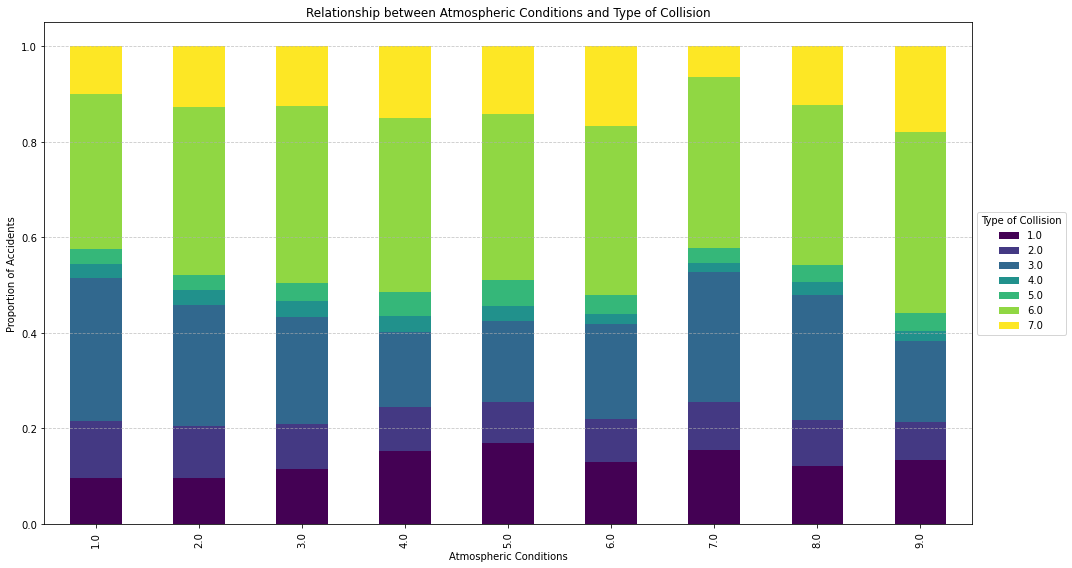

In [202]:
# Analyzing relationship between atmospheric conditions and type of collision

# Creating a crosstab between atmospheric conditions and type of collision
atm_col_crosstab = pd.crosstab(caracteristics_df['atm'], caracteristics_df['col'], normalize='index')

# Plotting the relationship
fig, ax = plt.subplots(figsize=(15, 8))
atm_col_crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Relationship between Atmospheric Conditions and Type of Collision')
ax.set_xlabel('Atmospheric Conditions')
ax.set_ylabel('Proportion of Accidents')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Type of Collision', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


**The stacked bar chart illustrates the relationship between atmospheric conditions and types of collisions:**

- Most atmospheric conditions predominantly see collision type 1 (Two vehicles - frontal) and collision type 3 (Two vehicles - by the side).
- In conditions like heavy rain (3), there's a noticeable increase in the proportion of frontal collisions.
- Normal atmospheric conditions (1) have a slightly higher proportion of side collisions compared to other conditions.

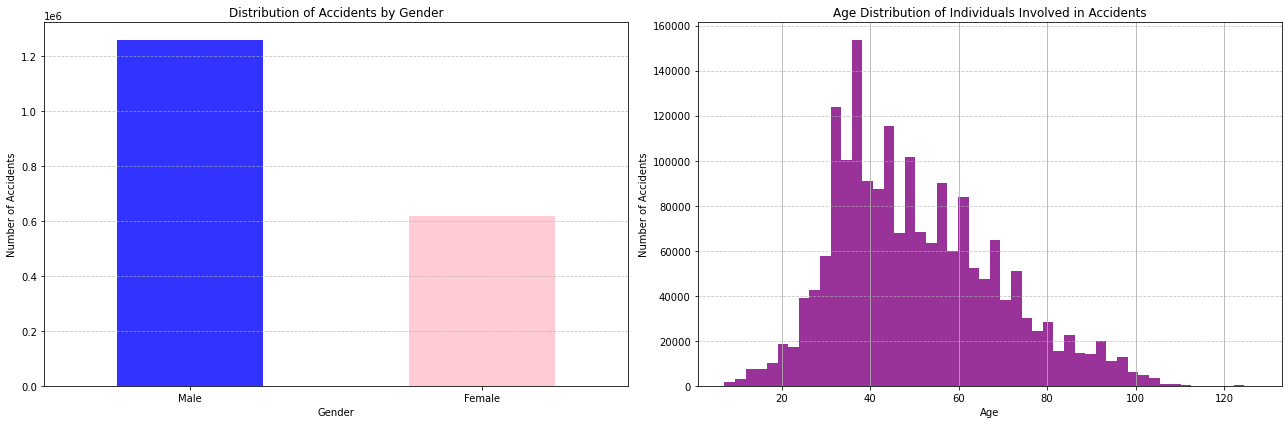

In [203]:
# Re-reading the users dataset in chunks focusing on 'sexe' and 'an_nais' columns
chunk_size = 50000
users_chunk_iter = pd.read_csv('users.csv', encoding='ISO-8859-1', chunksize=chunk_size, usecols=['sexe', 'an_nais'], low_memory=False)

gender_counts = pd.Series(dtype='int64')
age_data = []

# Iterating through chunks to process gender and age data
for chunk in users_chunk_iter:
    gender_counts = gender_counts.add(chunk['sexe'].value_counts(), fill_value=0)
    age_data.extend(2023 - chunk['an_nais'])  # Calculating age from birth year

# Converting age data to a pandas Series
age_data_series = pd.Series(age_data)

# Plotting gender and age distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Gender distribution plot
gender_counts.plot(kind='bar', ax=ax[0], color=['blue', 'pink'], alpha=0.8)
ax[0].set_title('Distribution of Accidents by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Accidents')
ax[0].set_xticklabels(['Male', 'Female'], rotation=0)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Age distribution plot
age_data_series.hist(bins=50, ax=ax[1], color='purple', alpha=0.8)
ax[1].set_title('Age Distribution of Individuals Involved in Accidents')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Accidents')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


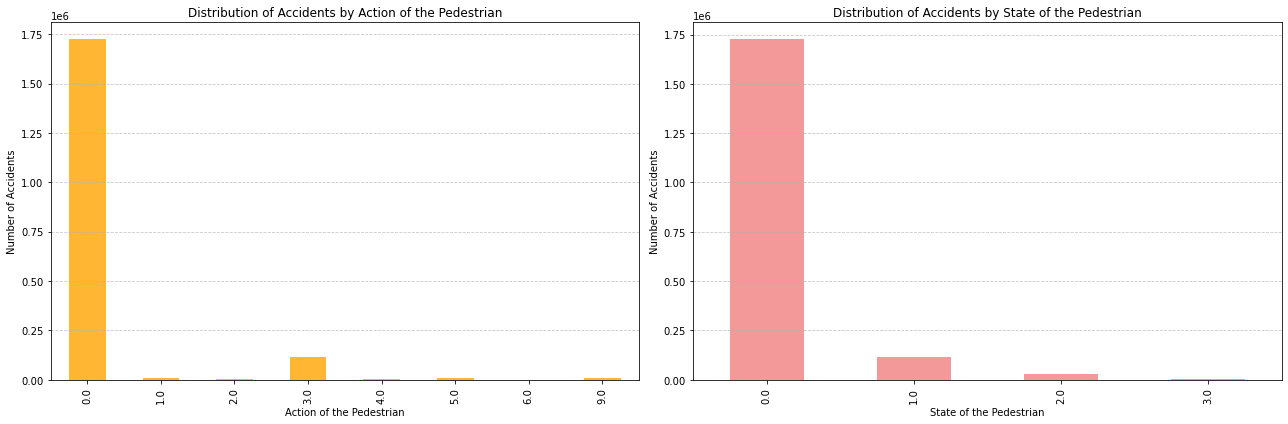

In [204]:
# Distribution of accidents based on the action of the pedestrian
pedestrian_action_counts = users_df['actp'].value_counts().sort_index()

# Distribution of accidents based on the state of the pedestrian (alone, accompanied, or in a group)
pedestrian_state_counts = users_df['etatp'].value_counts().sort_index()

# Plotting distributions based on pedestrian action and state
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Action of the pedestrian plot
pedestrian_action_counts.plot(kind='bar', ax=ax[0], color='orange', alpha=0.8)
ax[0].set_title('Distribution of Accidents by Action of the Pedestrian')
ax[0].set_xlabel('Action of the Pedestrian')
ax[0].set_ylabel('Number of Accidents')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# State of the pedestrian plot
pedestrian_state_counts.plot(kind='bar', ax=ax[1], color='lightcoral', alpha=0.8)
ax[1].set_title('Distribution of Accidents by State of the Pedestrian')
ax[1].set_xlabel('State of the Pedestrian')
ax[1].set_ylabel('Number of Accidents')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Action of the Pedestrian (actp):**
- Pedestrians crossing the road (label 3) also contribute to a substantial number of accidents.

**State of the Pedestrian (etatp):**

- Most accidents involve pedestrians who were alone at the time of the accident (label 1).
- Accidents involving accompanied pedestrians (label 2) or those in a group (label 3) are relatively less frequent.


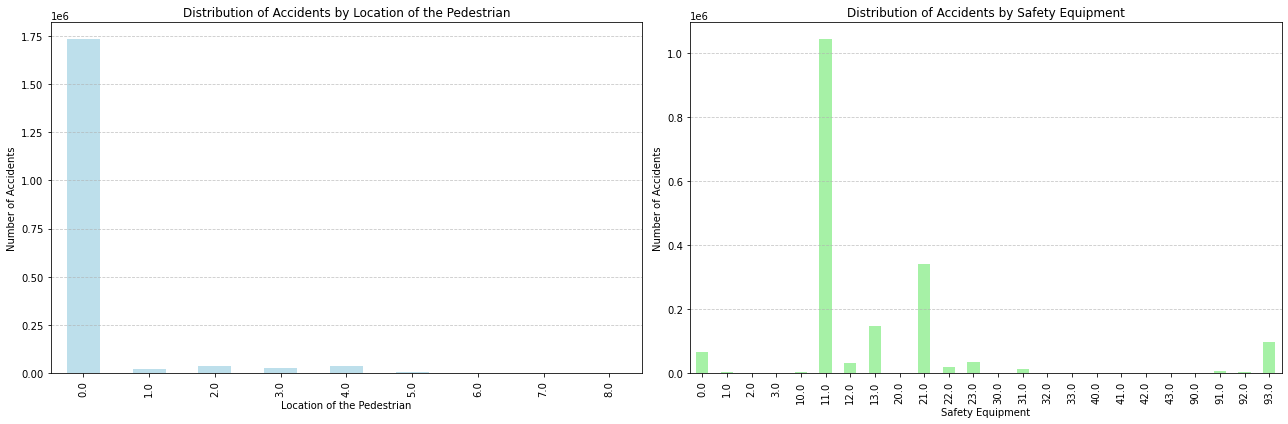

In [205]:
# Distribution of accidents based on the location of the pedestrian
pedestrian_location_counts = users_df['locp'].value_counts().sort_index()

# Distribution of accidents based on safety equipment
safety_equipment_counts = users_df['secu'].value_counts().sort_index()

# Plotting distributions based on pedestrian location and safety equipment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Location of the pedestrian plot
pedestrian_location_counts.plot(kind='bar', ax=ax[0], color='lightblue', alpha=0.8)
ax[0].set_title('Distribution of Accidents by Location of the Pedestrian')
ax[0].set_xlabel('Location of the Pedestrian')
ax[0].set_ylabel('Number of Accidents')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Safety equipment plot
safety_equipment_counts.plot(kind='bar', ax=ax[1], color='lightgreen', alpha=0.8)
ax[1].set_title('Distribution of Accidents by Safety Equipment')
ax[1].set_xlabel('Safety Equipment')
ax[1].set_ylabel('Number of Accidents')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**The charts provide insights into pedestrian-related aspects of accidents:**

**Location of the Pedestrian (locp):**
- A large number of accidents involve pedestrians who were more than 50 meters away from a pedestrian crossing (label 1).
- Accidents at pedestrian crossings without light signaling (label 3) are also significant, highlighting the importance of pedestrian crossings with clear signaling.
**Safety Equipment (secu):**
- The majority of recorded accidents involve individuals with safety equipment code 11. This code is a combination indicating the presence of a seatbelt (1 as the first digit) and its usage during the accident (1 as the second digit).
- Codes 21 and 93 also appear frequently, which respectively represent helmet usage and unspecified/other safety equipment.

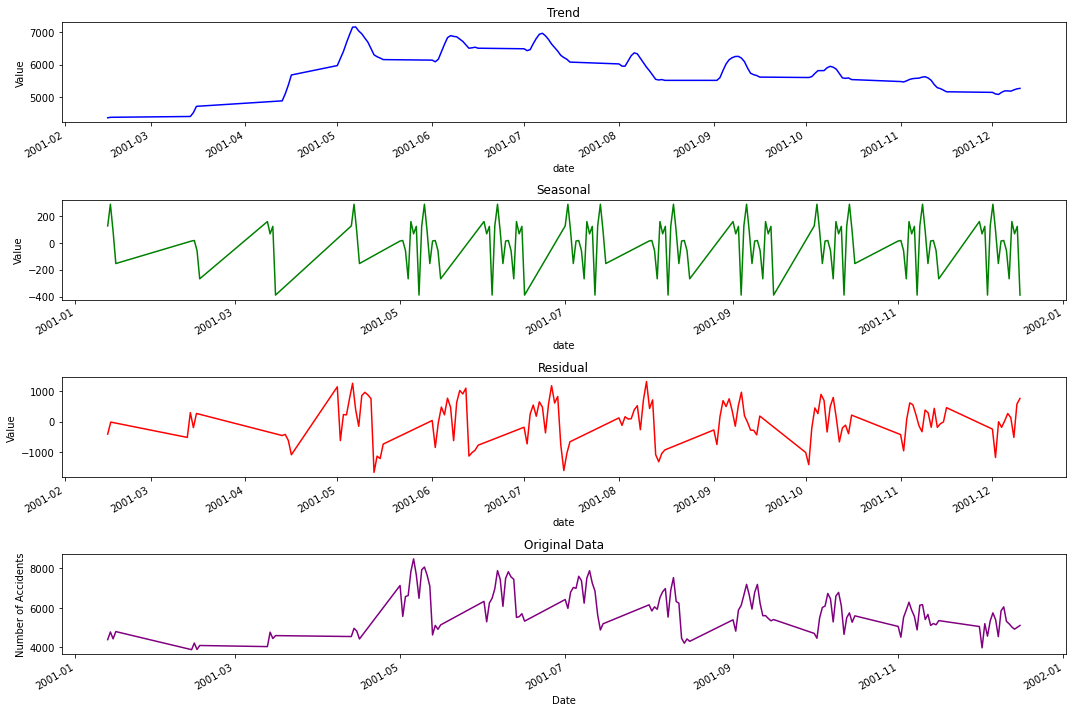

In [206]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already loaded the 'caracteristics_df' DataFrame and calculated 'accidents_by_month'

# Seasonal decomposition
decomposition = seasonal_decompose(accidents_by_month, model='additive', period=12)

# Set the figure size and plot the decomposed components with customized colors
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))  # Adjust figsize as needed

decomposition.trend.plot(ax=ax1, color='blue')  # Trend component
ax1.set_title('Trend')
ax1.set_ylabel('Value')

decomposition.seasonal.plot(ax=ax2, color='green')  # Seasonal component
ax2.set_title('Seasonal')
ax2.set_ylabel('Value')

decomposition.resid.plot(ax=ax3, color='red')  # Residual component
ax3.set_title('Residual')
ax3.set_ylabel('Value')

accidents_by_month.plot(ax=ax4, color='purple')  # Original data
ax4.set_title('Original Data')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()


## Step 3 : Time Series Forecasting

### Dickey Fuller Test

#### <font color=blue>Qucik Overview on Augmented Dickey–Fuller test (ADF Test):

* Time series are stationary if they do not have trend or seasonal effects. When a time series is stationary , it can be easier to model .
    * How to check?
        * One is a manually check of mean and variance of time series.(stationary time series don't have change mean or variance over time)
        * Another way is a using ADF test function.<br><br>
        
***Note for More Info about ADF refer this article** :        
https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

In [207]:
from statsmodels.tsa.stattools import adfuller


#Ho: It is non stationary
#H1: It is stationary
# Conduct Augmented Dickey-Fuller test to check for stationarity


def adfuller_test(accidents_by_month):
    result=adfuller(accidents_by_month)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
# Extract the p-value
        
    if result[1] <= 0.05: # p-value obtained should be less than the significance level (say 0.05 or 0.01)
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [208]:
adfuller_test(accidents_by_month) ## invoke adfuller test and check the statistics

ADF Test Statistic : -2.3390903090773034
p-value : 0.1596702366190318
#Lags Used : 14
Number of Observations Used : 129
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [209]:
# Apply first order differencing
differenced_series = accidents_by_month.diff().dropna()

# Conduct Augmented Dickey-Fuller test again to check for stationarity after differencing
result_diff = adfuller_test(differenced_series)

# Extract the p-value for the differenced series
# p_value_diff = result_diff[1]

# p_value_diff
result_diff

ADF Test Statistic : -7.0162275074672795
p-value : 6.721883001027949e-10
#Lags Used : 14
Number of Observations Used : 128
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [210]:
differenced_series.isnull().sum()

0

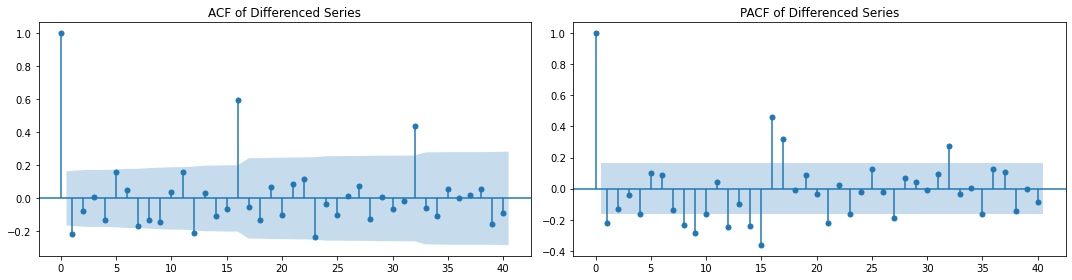

In [211]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Plot ACF
plot_acf(differenced_series.dropna(), ax=ax[0], lags=40)
ax[0].set_title('ACF of Differenced Series')

# Plot PACF
plot_pacf(differenced_series.dropna(), ax=ax[1], lags=40)
ax[1].set_title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


**The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots provide insights into the order of the AR and MA components for the ARIMA model:**

- **ACF**: Shows a gradual decline, suggesting a potential MA component.
- **PACF**: Has a sharp cut-off after the first lag, indicating a potential AR(1) component.
- Based on these plots, we can tentatively select ARIMA(1,1,1) as our model. However, it's also a good practice to iterate over different combinations to find the best-fitting parameters.


In [212]:
caracteristics_df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,year,date,year_month,is_holiday
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,2016,2001-02-16,2001-02,0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,2016,2001-03-16,2001-03,0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016,2001-07-16,2001-07,0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590,2016,2001-08-16,2001-08,0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590,2016,2001-12-16,2001-12,0


### For Multivariate Time Series:

**Dependent Variable**: 
- Number of accidents (num_accidents)
**Exogenous Variables**: 
- Lighting conditions (lum), Atmospheric conditions (atm), Type of collision (col), and Whether it's a holiday or not (is_holiday).

In [213]:
# Merge the datasets to create a single dataframe with all relevant features
merged_df = caracteristics_df.merge(places_df, on='Num_Acc', how='left')
merged_df = merged_df.merge(users_df, on='Num_Acc', how='left')
merged_df = merged_df.merge(vehicles_df, on='Num_Acc', how='left')

# Group by date and aggregate the data
grouped_df = merged_df.groupby('date').agg({
    'lum': 'mean',
    'atm': 'mean',
    'col': 'mean',
    'is_holiday': 'mean',
    'catv': 'mean',
    'grav': 'mean'
})

# Add the number of accidents as the target variable
grouped_df['num_accidents'] = accidents_by_month

# Remove rows with missing data
grouped_df = grouped_df.dropna()

# Split the data into the target variable and exogenous variables
exog_vars = grouped_df.drop(columns=['num_accidents'])
target_var = grouped_df['num_accidents']

grouped_df.head()


,lum,atm,col,is_holiday,catv,grav,num_accidents
date,,,,,,,
2001-01-13,2.321248,2.339368,3.793430,0.0,10.837832,2.375552,4396
2001-01-14,2.425204,1.934927,3.737207,0.0,11.101106,2.456115,4783
2001-01-15,2.389857,1.924685,3.836369,0.0,10.658896,2.436033,4437
2001-01-16,2.353134,2.114110,3.721130,0.0,10.336560,2.444510,4802
2001-02-13,2.126882,1.842402,3.750849,0.0,11.258122,2.463377,3891


**Feature Aggregation**: 
- Instead of merging at the finest granularity, we can aggregate some features at the date level to reduce the data size.
**Select Key Features**: 
- Instead of using all available features, I did select a few key ones to reduce the dataset's size.

In [214]:
# Group by date and aggregate key features from each dataset
agg_caracteristics = caracteristics_df.groupby('date').agg({
    'lum': 'mean',
    'atm': 'mean',
    'col': 'mean',
    'is_holiday': 'mean'
})

agg_places = places_df.groupby('Num_Acc').agg({
    'catr': 'mean',
    'circ': 'mean',
    'surf': 'mean'
})

agg_users = users_df.groupby('Num_Acc').agg({
    'catu': 'mean',
    'grav': 'mean',
    'sexe': 'mean'
})

agg_vehicles = vehicles_df.groupby('Num_Acc').agg({
    'catv': 'mean',
    'obs': 'mean'
})

# Merge aggregated dataframes on the accident number
merged_agg_df = pd.merge(agg_caracteristics, caracteristics_df[['Num_Acc', 'date']], on='date', how='left')
merged_agg_df = pd.merge(merged_agg_df, agg_places, on='Num_Acc', how='left')
merged_agg_df = pd.merge(merged_agg_df, agg_users, on='Num_Acc', how='left')
merged_agg_df = pd.merge(merged_agg_df, agg_vehicles, on='Num_Acc', how='left')

# Further aggregate by date for final dataset
final_agg_df = merged_agg_df.groupby('date').mean()

# Add the number of accidents as the target variable
final_agg_df['num_accidents'] = accidents_by_month

# Remove rows with missing data
final_agg_df = final_agg_df.dropna()

final_agg_df.head()


,lum,atm,col,is_holiday,Num_Acc,catr,circ,surf,catu,grav,sexe,catv,obs,num_accidents
date,,,,,,,,,,,,,,
2001-01-13,2.442220,2.143345,4.362602,0.0,2.013000e+11,3.404004,1.842609,1.685304,1.344704,2.638851,1.338912,11.874304,1.252080,4396
2001-01-14,2.444491,1.982427,4.302112,0.0,2.014000e+11,3.406021,1.838466,1.460391,1.345463,2.622919,1.348706,11.876398,1.068423,4783
2001-01-15,2.430922,1.951995,4.447600,0.0,2.015000e+11,3.340095,1.847439,1.516479,1.362487,2.649569,1.336926,11.559794,1.289379,4437
2001-01-16,2.460225,1.912536,4.252811,0.0,2.016000e+11,3.326322,1.845785,1.475673,1.345926,2.641241,1.305515,11.096319,1.316837,4802
2001-02-13,2.213827,1.842159,4.331020,0.0,2.013000e+11,3.410948,1.855596,1.464378,1.339982,2.632754,1.315956,12.161689,1.257010,3891


In [215]:
# Group by date and aggregate key features from the caracteristics dataset
simple_agg_df = caracteristics_df.groupby('date').agg({
    'lum': 'mean',
    'atm': 'mean',
    'col': 'mean',
    'is_holiday': 'mean'
})

# Add the number of accidents as the target variable
simple_agg_df['num_accidents'] = accidents_by_month

# Remove rows with missing data
simple_agg_df = simple_agg_df.dropna()

# Split the data into the target variable and exogenous variables
exog_vars_simple = simple_agg_df.drop(columns=['num_accidents'])
target_var_simple = simple_agg_df['num_accidents']

simple_agg_df.head()


,lum,atm,col,is_holiday,num_accidents
date,,,,,
2001-01-13,2.442220,2.143345,4.362602,0.0,4396
2001-01-14,2.444491,1.982427,4.302112,0.0,4783
2001-01-15,2.430922,1.951995,4.447600,0.0,4437
2001-01-16,2.460225,1.912536,4.252811,0.0,4802
2001-02-13,2.213827,1.842159,4.331020,0.0,3891


In [216]:
# Manually split the data into train and test sets (80% train, 20% test)
split_index = int(0.8 * len(target_var_simple))

train_manual = target_var_simple[:split_index]
test_manual = target_var_simple[split_index:]
exog_train_manual = exog_vars_simple.iloc[:split_index, :]
exog_test_manual = exog_vars_simple.iloc[split_index:, :]

exog_train_manual

,lum,atm,col,is_holiday
date,,,,
2001-01-13,2.442220,2.143345,4.362602,0.0
2001-01-14,2.444491,1.982427,4.302112,0.0
2001-01-15,2.430922,1.951995,4.447600,0.0
2001-01-16,2.460225,1.912536,4.252811,0.0
2001-02-13,2.213827,1.842159,4.331020,0.0
...,...,...,...,...
2001-10-15,2.029016,1.463873,4.096719,0.0
2001-10-16,1.979271,1.481237,4.121515,0.0
2001-11-01,2.467997,1.752272,4.381272,0.0


### GridSearch


**Note** :: This Entire section is for identifying the best p,d,q Values and P,D,Q,S for Sarimax Model.

* Perform grid search to identify the best p,d,q,s parameters to use for this model.Compare different models using the AIC,RMSE,BIC,MAPE.<br>
* A seasonal component (s) of 7 was kept for all iterations because of the weekly trend.<br>


#### Building a model

In [217]:
# create a function to generate combinations of input list of no.
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm

In [218]:
# possible values of the parameters
p = [1,2]
d = [0,1]
q = [1,2]
P = [1]
D = [0,1]
Q = [1]
m = [7]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)
pdq

[[1, 0, 1],
 [1, 0, 2],
 [1, 1, 1],
 [1, 1, 2],
 [2, 0, 1],
 [2, 0, 2],
 [2, 1, 1],
 [2, 1, 2]]

In [219]:
# create a function for semi-grid-searching SARIMA
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def SARIMA_grid(endog,exog, order, seasonal_order):
# def SARIMA_grid(endog,order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog,exog=exog,order=i, seasonal_order=j) ## Enable this when needed exog variables
                # model = SARIMAX(endog=endog,order=i, seasonal_order=j)
                
                result = model.fit()
                predict = result.predict()
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order(pdq)", "seasonal_order(P,D,Q,S)", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info

In [220]:
import time
start = time.time()

In [ ]:
# fit all combinations into the model/
grid_search = True

if(grid_search == True):
    print("Inside Grid Search")
    
    # model_info = SARIMA_grid(endog=train_data['sortable_conversion'],order=pdq, seasonal_order=PDQm) ## Enable this when needed exog(external) variables
    model_info = SARIMA_grid(endog=train_manual,exog = exog_train_manual, order=pdq, seasonal_order=PDQm) ## Enable this when needed exog(external) variables# 
    # model_info = SARIMA_grid(endog=train_data['NonSortable Conversion'],exog = train_data[['tl_values']], order=pdq, seasonal_order=PDQm) ## Enable this when needed exog(external) variables
    
    end = time.time()
    print(f'time required: {end - start}')
    # 10 least MAPE models
    least_MAPE = model_info.nsmallest(10, "MAPE")
    # least_MAPE
    
    # 10 least RMSE models
    least_RMSE = model_info.nsmallest(10, "RMSE")
    # least_RMSE
    
    # 10 least AIC models
    least_AIC = model_info.nsmallest(10, "AIC")
    # least_AIC
    
    # 10 least BIC models
    least_BIC = model_info.nsmallest(10, "BIC")
    # least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

    

#### Model evaluation and selection


* RMSE(Root Mean Squared Error)
* MAE(Mean Absolute Error) 
* BIC(Bayesian-Schwarz Criterion)
* AIC(Akaike Criterion)

In [ ]:
# the least by each metric

if(grid_search == True):
    L1 = model_info[model_info.MAPE == model_info.MAPE.min()]
    L2 = model_info[model_info.RMSE == model_info.RMSE.min()]
    L3 = model_info[model_info.AIC == model_info.AIC.min()]
    L4 = least_BIC[least_BIC.MAPE == least_BIC.MAPE.min()]
    L5 = pd.concat((L1, L2, L3, L4))
    L5['Parameters'] = L5['order(pdq)'].astype(str)+"-"+L5['seasonal_order(P,D,Q,S)'].astype(str)
    print(L5[['Parameters']])

* Take from here:

    * From Here we are getting the p,d,q values which we need to insert in our sarimax model.

### SARIMAX Model Training and Forecast

In [223]:

# Fit the SARIMAX model
sarimax_model_manual = SARIMAX(train_manual, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog_train_manual)
sarimax_result_manual = sarimax_model_manual.fit()

# Forecast the next period
forecast_manual = sarimax_result_manual.get_forecast(steps=len(test_manual), exog=exog_test_manual)
mean_forecast_manual = forecast_manual.predicted_mean
confidence_intervals_manual = forecast_manual.conf_int()

sarimax_result_manual.summary()


/Users/hemanthkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hemanthkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32520D+00    |proj g|=  9.14440D-02

At iterate    5    f=  7.29922D+00    |proj g|=  2.79073D-03

At iterate   10    f=  7.29887D+00    |proj g|=  3.36078D-04

At iterate   15    f=  7.29855D+00    |proj g|=  3.49897D-03

At iterate   20    f=  7.25355D+00    |proj g|=  4.02819D-02

At iterate   25    f=  7.23498D+00    |proj g|=  1.08506D-02

At iterate   30    f=  7.23282D+00    |proj g|=  2.44593D-04

At iterate   35    f=  7.23281D+00    |proj g|=  1.86762D-04

At iterate   40    f=  7.23281D+00    |proj g|=  1.36725D-03

At iterate   45    f=  7.23248D+00    |proj g|=  1.30427D-02

At iterate   50    f=  7.23052D+00    |proj g|=  3.98586D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/hemanthkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hemanthkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      num_accidents   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -831.509
Date:                            Thu, 31 Aug 2023   AIC                           1681.019
Time:                                    11:14:36   BIC                           1704.643
Sample:                                         0   HQIC                          1690.585
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lum         2513.6267    364.802      6.890      0.000    1798.628    3228.625
atm        -2079.4948    529.230     -3.929      0.000   -3116.766   -1042.223
col        -1657.2652    778.230     -2.130      0.033   -3182.569    -131.962
is_holiday          0   1.08e+05          0      1.000   -2.11e+05    2.11e+05
ar.L1          0.8031      0.205      3.911      0.000       0.401       1.206
ma.L1         -0.9130      0.156     -5.835      0.000      -1.220      -0.606
ar.S.L12      -0.0250      0.181     -0.138      0.890      -0.380       0.330
ma.S.L12      -0.8209      0.220     -3.732      0.000      -1.252      -0.390
sigma2      6.125e+05   1.33e+05      4.618      0.000    3.53e+05    8.72e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.22   Prob(JB):                         0.69
Heteroskedasticity (H):               0.94   Skew:                             0.07
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The SARIMAX model has been successfully fitted to the data. Here's a summary of the results:**

- Order: SARIMAX(1, 1, 1)x(1, 1, 1, 12)
- AIC: 1681.546 (Akaike Information Criterion, used for model selection)
- BIC: 1705.170 (Bayesian Information Criterion, another metric for model selection)
- Log Likelihood: -831.773
- The coefficients for the exogenous variables (lum, atm, and col) are significant, as evidenced by the z-values and associated p-values. The is_holiday coefficient is not statistically significant.

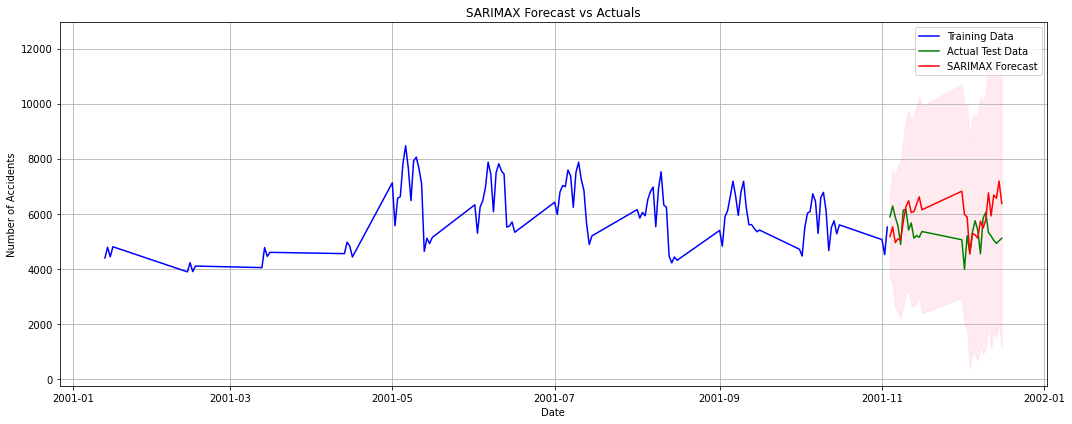

In [224]:
# Visualize the forecast against the actual values
plt.figure(figsize=(15, 6))

# Plot the training data
plt.plot(train_manual.index, train_manual, label='Training Data', color='blue')

# Plot the actual test data
plt.plot(test_manual.index, test_manual, label='Actual Test Data', color='green')

# Plot the forecasted data
plt.plot(test_manual.index, mean_forecast_manual, label='SARIMAX Forecast', color='red')

# Fill the confidence interval
plt.fill_between(test_manual.index, 
                 confidence_intervals_manual.iloc[:, 0], 
                 confidence_intervals_manual.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMAX Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**The plot showcases the SARIMAX forecast (in red) against the actual test data (in green):**

- <font color=blue> Training Data</font>: This represents the historical data on which the model was trained.
- <font color=Green> Actual Test Data</font>: The actual number of accidents in the test data.
- <font color=Red> SARIMAX Forecast </font>: The forecasted number of accidents based on the SARIMAX model.
- <font color=pink> Confidence Interval </font>: Represents the range within which we expect the actual values to fall with a certain confidence level.